In [30]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.tree import DecisionTreeClassifier, plot_tree
from bioinfokit.visuz import cluster

In [3]:
mcdonalds = pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")

In [4]:
mcdonalds.shape

(1453, 15)

In [5]:
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [6]:
mcdonalds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [7]:
mcdonalds.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [8]:
mcdonalds.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [9]:
mcdonalds.duplicated().sum()

22

In [10]:
mcdonalds= mcdonalds.drop_duplicates()

In [11]:
mcdonalds.shape

(1431, 15)

In [12]:
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [14]:
# Preprocessing
MD_x = mcdonalds.iloc[:, 1:12].applymap(lambda x: int(x == "Yes"))

In [15]:
MD_x = mcdonalds.drop(['Like', 'Age', 'VisitFrequency', 'Gender'], axis='columns')
MD_x = (MD_x == "Yes").astype(int)

# Convert MD_x to a NumPy matrix
MD_x = MD_x.to_numpy()
mean_values = MD_x.mean(axis=0)

print(MD_x)

[[0 1 0 ... 1 0 0]
 [1 1 0 ... 1 0 0]
 [0 1 1 ... 1 1 0]
 ...
 [1 1 0 ... 1 0 0]
 [1 1 0 ... 0 1 0]
 [0 1 0 ... 1 0 1]]


In [16]:
MD_x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [17]:
#Calculating PCA components
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

standard_deviations = np.sqrt(pca.explained_variance_)
proportion_of_variance = pca.explained_variance_ratio_
cumulative_proportion = np.cumsum(proportion_of_variance)

In [18]:
MD_pca

array([[ 4.19113806e-01, -2.31691391e-01,  6.60553168e-01, ...,
         1.79510380e-01,  5.31100817e-01, -5.54208508e-01],
       [-2.20188876e-01,  3.93341490e-01, -7.29515760e-01, ...,
         1.10699021e-01,  5.07822221e-01, -4.87601821e-01],
       [ 3.71455247e-01,  7.28362199e-01, -1.24167748e-01, ...,
        -3.27910666e-01,  5.01506991e-02,  2.43132418e-01],
       ...,
       [-1.82780601e-01,  1.05779801e+00,  2.29391859e-01, ...,
         3.93455143e-02,  5.79635435e-02, -1.21597204e-02],
       [-1.18878712e+00, -3.35210389e-02,  5.55086354e-01, ...,
         2.33369806e-02, -2.36798958e-05, -1.07267886e-01],
       [ 1.54701278e+00,  2.63927936e-01, -1.41917977e-02, ...,
        -1.36214561e-01, -4.19146109e-01, -4.64879460e-01]])

In [19]:
print('Standard Deviation')
print(standard_deviations)

print('Proportion of Variance')
print(proportion_of_variance)

print('Cumulative Proportion')
print(cumulative_proportion)

Standard Deviation
[0.75797646 0.60671375 0.50492797 0.39912808 0.33869234 0.31210587
 0.29176066 0.27672139 0.26720117 0.25029173 0.2383499 ]
Proportion of Variance
[0.29899056 0.19156392 0.13267983 0.08290307 0.05969759 0.05069322
 0.04429957 0.03985029 0.03715547 0.03260161 0.02956487]
Cumulative Proportion
[0.29899056 0.49055448 0.62323431 0.70613738 0.76583497 0.81652819
 0.86082776 0.90067805 0.93783352 0.97043513 1.        ]


In [20]:
eigenvector = pca.components_
component_matrix = np.transpose(eigenvector)
component_matrix_df = pd.DataFrame(component_matrix, columns=[f"PC{i+1}" for i in range(component_matrix.shape[1])], index=['yummy','convinient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting'])
print(component_matrix_df)

                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy      -0.473652  0.370610 -0.301355  0.053818 -0.307839  0.170267   
convinient -0.155302  0.016830 -0.062892 -0.144547  0.276766 -0.343663   
spicy      -0.007448  0.019080 -0.039472  0.199271  0.073973 -0.353279   
fattening   0.116058 -0.034366 -0.322261 -0.349149 -0.069891 -0.403426   
greasy      0.303698 -0.057601 -0.802992  0.245048  0.362733  0.215346   
fast       -0.109396 -0.086865 -0.065928 -0.097602  0.112772 -0.598702   
cheap      -0.341107 -0.606855 -0.155916  0.123186 -0.127236 -0.101218   
tasty      -0.469349  0.312024 -0.285723 -0.006973 -0.211855 -0.079163   
expensive   0.333174  0.598525  0.028200  0.068841 -0.000381 -0.262920   
healthy    -0.215667  0.079695  0.187549  0.763972  0.296197 -0.169930   
disgusting  0.373698 -0.140499 -0.093598  0.376039 -0.724694 -0.214508   

                 PC7       PC8       PC9      PC10      PC11  
yummy      -0.278457  0.012604  0.574230 -0.1076

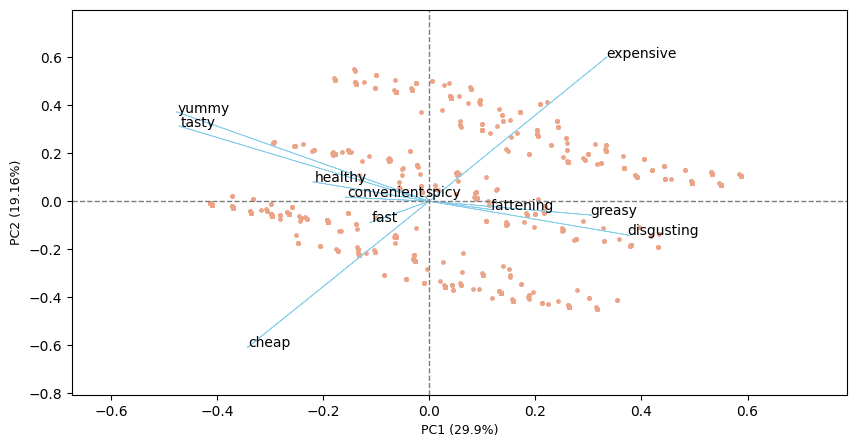

In [31]:
cluster.biplot(cscore=MD_pca, loadings=eigenvector, labels=mcdonalds.columns.values,
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

In [32]:
#Extracting Segments



#using k-mean clustering
k = range(2,9)
inertia_values = []
for item in k:
    k_means = KMeans(n_clusters=item, n_init=10,random_state=1234)
    k_means.fit(MD_x)
    inertia_values.append(k_means.inertia_)

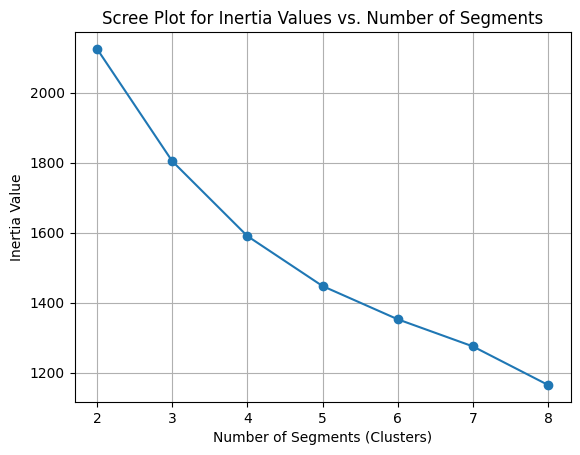

In [33]:
plt.plot(k, inertia_values, marker='o')
plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('Inertia Value')
plt.title('Scree Plot for Inertia Values vs. Number of Segments')
plt.grid(True)
plt.show()

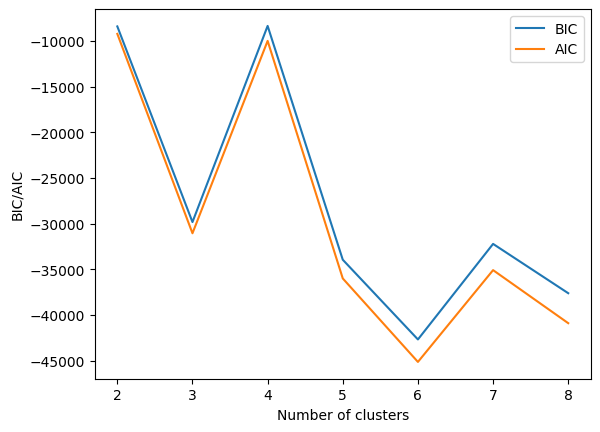

In [34]:
# using gaussian mixture model
result_bic = []
result_aic = []

for k in range(2, 9):
    gmm = GaussianMixture(n_components=k)
    model = gmm.fit(MD_x)  # Extract the underlying NumPy array using .values
    bic = gmm.bic(MD_x)  # Use the same data for BIC calculation
    aic = gmm.aic(MD_x)  # Use the same data for AIC calculation
    result_bic.append(bic)
    result_aic.append(aic)

plt.plot(range(2, 9), result_bic, label="BIC")
plt.plot(range(2, 9), result_aic, label="AIC")
plt.xlabel("Number of clusters")
plt.ylabel("BIC/AIC")
plt.legend()
plt.show()


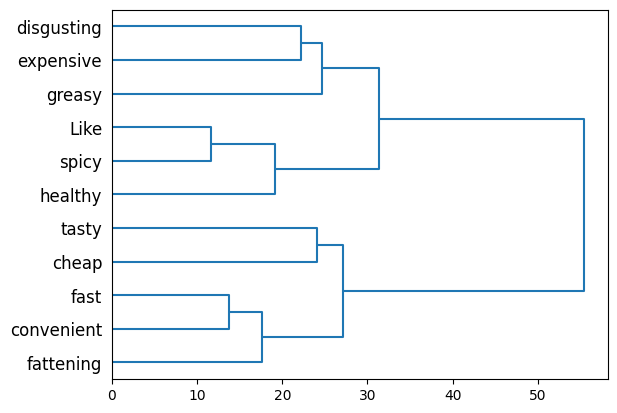

In [22]:
# Plotting the dendrogram
MD_vclust = linkage(MD_x.T, method='ward')
dendrogram(MD_vclust, labels=MD_x.columns, orientation='right', color_threshold=0)
plt.show()

In [35]:
X = MD_x

# K-means clustering
kmeans_model = KMeans(n_clusters=4)
kmeans_clusters = kmeans_model.fit_predict(X)

# Finite Mixture Modeling
gmm_model = GaussianMixture(n_components=4, random_state=0)
gmm_clusters = gmm_model.fit_predict(X)

# Create the contingency table
table = pd.crosstab(kmeans_clusters + 1, gmm_clusters + 1)

print(table)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


col_0   1    2    3    4
row_0                   
1      22    0  278    4
2      20  471   57    1
3      47  248   13   30
4      66    0   15  159


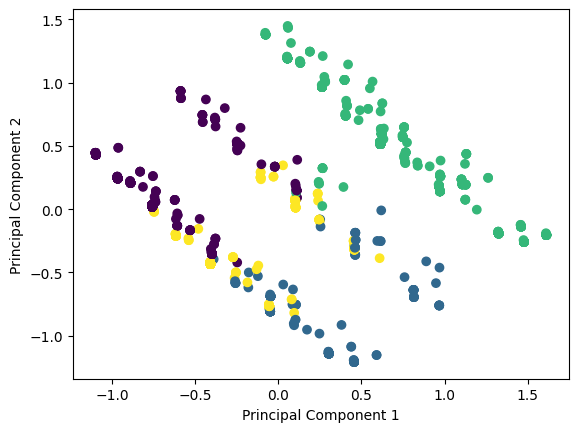

In [23]:
# Scatter plot of the clusters using PCA
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_k4, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


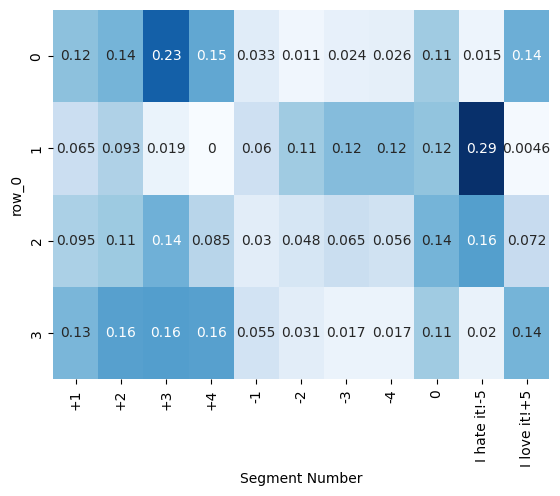

In [24]:
# Mosaic plot of clusters with 'Like' and 'Gender'
mosaic_data = pd.crosstab(MD_k4, mcdonalds['Like'], normalize='index')
sns.heatmap(mosaic_data, annot=True, cmap='Blues', cbar=False)
plt.xlabel("Segment Number")
plt.show()


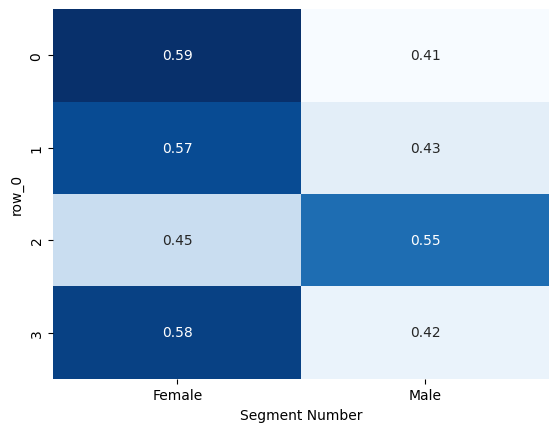

In [25]:
mosaic_data = pd.crosstab(MD_k4, mcdonalds['Gender'], normalize='index')
sns.heatmap(mosaic_data, annot=True, cmap='Blues', cbar=False)
plt.xlabel("Segment Number")
plt.show()


In [36]:
like_freq_table = mcdonalds['Like'].value_counts().sort_index(ascending=True)

# Reverse the order of elements using indexing or iloc
reversed_table = like_freq_table.iloc[::-1]

print(reversed_table)

I love it!+5    140
I hate it!-5    150
0               168
-4               70
-3               73
-2               59
-1               58
+4              156
+3              225
+2              180
+1              152
Name: Like, dtype: int64


In [37]:
mcdonalds['Like.n'] = 6 - pd.Categorical(mcdonalds['Like']).codes

# Calculate the frequency table of 'Like.n' column
like_n_freq_table = mcdonalds['Like.n'].value_counts().sort_index()

print(like_n_freq_table)

-4    140
-3    150
-2    168
-1     70
 0     73
 1     59
 2     58
 3    156
 4    225
 5    180
 6    152
Name: Like.n, dtype: int64


In [38]:
column_names = mcdonalds.columns[:11]

# Create the formula string 'f' by joining the column names using "+"
f = " + ".join(column_names)
f = "Like.n - " + f
print(f)

Like.n - yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [39]:
k_means = KMeans(n_clusters=item, n_init=10,random_state=1234)

In [40]:
#Describing segment using mosaic plot



data_array = MD_x
k = 4
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(data_array)
k4 = kmeans_model.labels_
Like = mcdonalds['Like']
Like= list(Like)
k4 = list(k4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
data = {'Like': Like, 'k4': k4}
df = pd.DataFrame(data)

<Figure size 1500x1700 with 0 Axes>

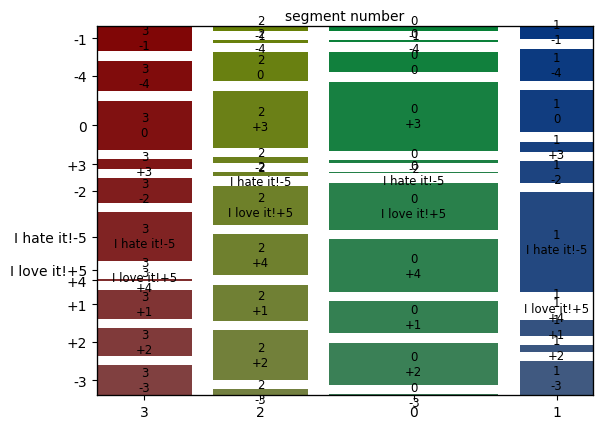

In [42]:
plt.figure(figsize=(15, 17))
mosaic(df,index = ['k4','Like'],gap=0.05,)
plt.xlabel("segment number")
plt.show()

In [43]:
Age = list(mcdonalds['Age'])
VisitFrequency = list(mcdonalds['VisitFrequency'])
Gender = list(mcdonalds['Gender'])

In [44]:
d = {'Like': Like, 'k4': k4, 'Age':Age , 'VisitFrequency': VisitFrequency , 'Gender' : Gender}

[Text(0.7072807129593003, 0.9807692307692307, 'x[17] <= 0.5\ngini = 0.343\nsamples = 1431\nvalue = [1117, 314]\nclass = False'),
 Text(0.49607074378076654, 0.9423076923076923, 'x[14] <= 0.5\ngini = 0.292\nsamples = 1179\nvalue = [970, 209]\nclass = False'),
 Text(0.3716026338343882, 0.9038461538461539, 'x[12] <= 0.5\ngini = 0.249\nsamples = 1051\nvalue = [898, 153]\nclass = False'),
 Text(0.25997302434950775, 0.8653846153846154, 'x[11] <= 0.5\ngini = 0.177\nsamples = 712\nvalue = [642, 70]\nclass = False'),
 Text(0.25716008482770747, 0.8269230769230769, 'x[4] <= 0.5\ngini = 0.211\nsamples = 585\nvalue = [515, 70]\nclass = False'),
 Text(0.20489682225738395, 0.7884615384615384, 'x[3] <= 0.5\ngini = 0.257\nsamples = 449\nvalue = [381, 68]\nclass = False'),
 Text(0.1453773294655415, 0.75, 'x[0] <= 69.5\ngini = 0.324\nsamples = 280\nvalue = [223, 57]\nclass = False'),
 Text(0.1425643899437412, 0.7115384615384616, 'x[0] <= 21.5\ngini = 0.317\nsamples = 278\nvalue = [223, 55]\nclass = False'

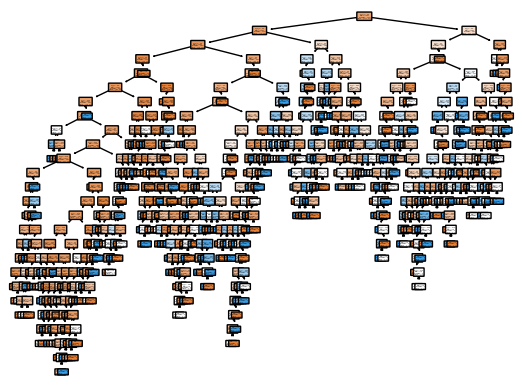

In [45]:
d = pd.DataFrame(d)

X = d[['Like', 'Age', 'VisitFrequency', 'Gender']]
y = d['k4']==3
X = pd.get_dummies(X)
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X, y)
plot_tree(tree_model, class_names=["False", "True"], filled=True, rounded=True)

In [46]:
#Selecting Target Segments


d['visit.n'] = 6 - pd.Categorical(d['VisitFrequency']).codes

visit_means = d.groupby('k4')['visit.n'].mean()
print(visit_means)

k4
0    3.403915
1    3.322314
2    3.440895
3    3.229299
Name: visit.n, dtype: float64


In [47]:
d['Like.n'] = 6 - pd.Categorical(d['Like']).codes

like_means = d.groupby('k4')['Like.n'].mean()
print(like_means)

k4
0    2.220641
1   -0.702479
2    2.188498
3    0.560510
Name: Like.n, dtype: float64


In [48]:
d['gender.n'] = 1 - pd.Categorical(d['Gender']).codes

gender_means = d.groupby('k4')['gender.n'].mean()
print(gender_means)

k4
0    0.601423
1    0.433884
2    0.476038
3    0.573248
Name: gender.n, dtype: float64
